# MNIST Dataset

## 1. Setup

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow
import matplotlib
from matplotlib import pyplot

### 1.1. Loading Data

This is an example image from the MNIST dataset:


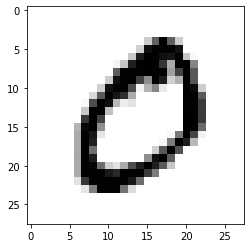

In [3]:
# Load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
print("This is an example image from the MNIST dataset:")
pyplot.imshow(trainX[1], cmap='gray_r')

# Reshape dataset
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# One hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

### 1.2. Normalization

In [4]:
# Convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

### 1.3 Auxiliary Functions

In [5]:
def predict(x, model):
    
    # Input: single image from the dataset
    # Output: Output & prediction of the NN
    # Arguments: 1. input image (28x28), 2. model
    
    activations = model.predict(x.reshape(1, 28, 28, 1))
    prediction = np.argmax(activations)
    
    # Print the prediction of the network
    print('Network output: ')
    print(activations)
    print('Network prediction: ')
    print(prediction)
    ## barplot of prediction probabilities
    pyplot.bar(range(10), activations[0])
    pyplot.show()
      
    print('Actual image: ')
    ## input image
    pyplot.imshow(x.reshape((28,28)), cmap='gray_r')
    pyplot.axis('off')
    pyplot.show()

In [6]:
def predict_adv(x, x_adv, model):
    
    # Input: single image from the dataset
    # Output: Output & prediction of the NN
    # Arguments: 1. input image (28x28), 2. adversarial image, 3.model
    
    activations = model.predict(x.reshape(1, 28, 28, 1))
    prediction = np.argmax(activations)
    
    activations2 = model.predict(x_adv.reshape(1, 28, 28, 1))
    prediction2 = np.argmax(activations2)
    
    
    # barplots
    ## actual
    print('Adversarial Example: Network output = ' + str(activations))
    print('Network prediction = ' + str(prediction))
    
    ## adversarial
    print('Adversarial Example: Network output = ' + str(activations2))
    print('Network prediction = ' + str(prediction2))
    
    pyplot.figure(figsize=(2,2))
    pyplot.subplot(2, 2, 1)
    pyplot.bar(range(10), activations[0])
    
    pyplot.subplot(2, 2, 2)
    pyplot.bar(range(10), activations2[0])
    
    # images
    print('Actual and Adversarial example images: ')

    pyplot.subplot(2, 2, 3)
    pyplot.imshow(x.reshape((28,28)), cmap='gray_r')
    pyplot.axis('off')
    
    pyplot.subplot(2, 2, 4)
    pyplot.imshow(x_adv.reshape((28,28)), cmap='gray_r')
    pyplot.axis('off')
    pyplot.show()
    
    
def return_class(x, model):

    activations = model.predict(x.reshape(1, 28, 28, 1))
    prediction = np.argmax(activations)
    
    return prediction

## 2. Model Construction

In [ ]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o

inp = l.Input(shape = (28, 28, 1))
hid = l.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', kernel_initializer = 'he_uniform')(inp)
hid = l.MaxPooling2D((2,2))(hid)
hid = l.Conv2D(64, (3,3), activation = "relu", padding = 'same', kernel_initializer = 'he_uniform')(hid)
hid = l.MaxPooling2D((3,3))(hid)
hid = l.Flatten()(hid)
hid = l.Dense(100, activation = 'relu', kernel_initializer = 'he_uniform')(hid)
out = l.Dense(10, activation = 'softmax')(hid)

mnist_classifier = m.Model(inp, out)
mnist_classifier.summary()
mnist_classifier.compile(
    loss='categorical_crossentropy',
    optimizer=o.Adam(),
    metrics=["accuracy"]
)

### 2.1. Model Training

In [ ]:
mnist_classifier.fit(
    trainX,
    trainY,
    batch_size=32,
    epochs=10,
    validation_data=(testX, testY)
)

test_loss, test_accuracy = mnist_classifier.evaluate(testX, testY, verbose=0)
print('> %.3f' % (test_accuracy * 100.0))

### 2.2. Loading Model from File

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500

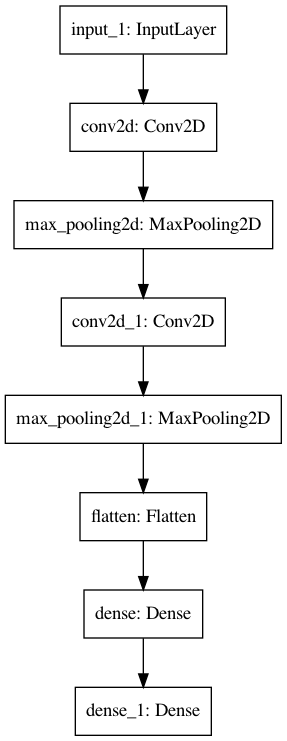

In [8]:
mnist_classifier = keras.models.load_model('CNN_model_mnist.h5')
mnist_classifier.summary()
keras.utils.plot_model(mnist_classifier) ##

### 2.3. Testing some examples

Network output: 
[[4.5278975e-11 4.3830338e-15 2.0344745e-11 5.7897419e-12 7.4285164e-13
  7.5022655e-08 9.9999988e-01 1.5131866e-17 2.9747824e-09 1.1414739e-15]]
Network prediction: 
6


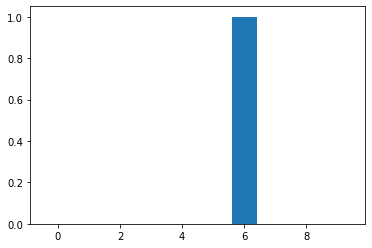

Actual image: 


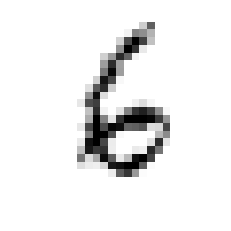

Network output: 
[[1.2710695e-14 2.2717034e-14 9.3050445e-10 2.7317959e-10 5.0414593e-07
  2.7049385e-10 3.7991067e-15 1.2835730e-13 3.8406636e-08 9.9999952e-01]]
Network prediction: 
9


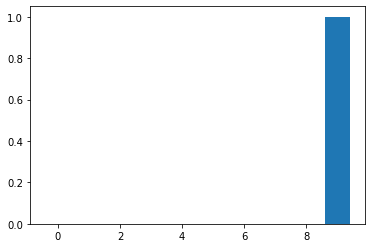

Actual image: 


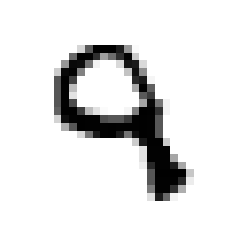

Network output: 
[[2.1879388e-12 6.2955037e-11 5.3729497e-07 1.2431213e-20 9.9999940e-01
  8.9156431e-17 3.0850479e-15 1.4414887e-11 9.4356108e-15 1.2590894e-10]]
Network prediction: 
4


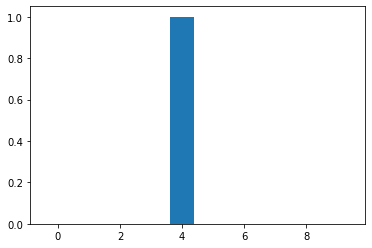

Actual image: 


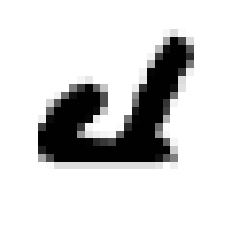

In [9]:
predict(testX[2000], mnist_classifier)
predict(testX[4000], mnist_classifier)
predict(testX[8000], mnist_classifier)

## 3. Creating Adversarial Examples

For this purpose, 5 digits were chosen at random by rolling a d10. the results were, in order of appearance:
* 1 (i = 0)
* 6 (i = 1)
* 4 (i = 2)
* 0 (i = 3)
* 5 (i = 4)

For those digits an example from the MNIST dataset was "fished".

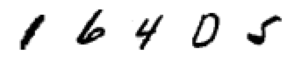

In [10]:
(trainX, trainY), (testX, testY) = mnist.load_data()

digits = np.array([1, 6, 4, 0, 5])
indexes = np.random.randint(0, trainX.shape[0], size=50)

labind = []
for i in range(len(digits)):
    lab = np.where(trainY[indexes] == digits[i])
    labind.append(indexes[lab[0][0]])
    
images = trainX[labind]

# Plot the 5 sample digits
pyplot.figure(figsize=(5,1))
for i in range(len(digits)):
    pyplot.subplot(1, 5, i + 1)
    image = images[i]
    pyplot.imshow(image, cmap='gray_r')
    pyplot.axis('off')

# pyplot.savefig("MNIST_5samples.png")
# pyplot.show()
# pyplot.close('all')

### 3.1. Defining the MNIST-simple-generator model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 202,000
Trainable params: 202,000
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
______________________________________

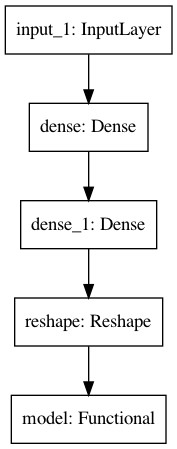

In [11]:
import tensorflow as tf
import keras.layers as l
import keras.models as m
import keras.optimizers as o

mnist_classifier.trainable = False

inp = l.Input(shape=(1,))
hid = l.Dense(256, activation="relu")(inp)
hid = l.Dense(28*28, activation="sigmoid")(hid)
out = l.Reshape((28, 28))(hid)

adverseModel = m.Model(inp, out)
adverseModel.compile(
    loss='mean_squared_error',
    optimizer=o.Adam(lr=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

compositeModel = m.Model(inp, mnist_classifier(out))
compositeModel.compile(
    loss='categorical_crossentropy',
    optimizer=o.Adam(lr=0.009),
    metrics=["accuracy"]
)

adverseModel.summary()
compositeModel.summary()

keras.utils.plot_model(adverseModel)
keras.utils.plot_model(compositeModel)

### 3.2. Creating Adversarial Examples

100%|██████████| 1000/1000 [00:15<00:00, 64.75it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[9.9146020e-01 6.8726065e-03 3.4162975e-04 4.6744475e-12 5.3910247e-07
  6.1818866e-08 7.2257176e-06 2.0438999e-06 1.3144235e-03 1.1615488e-06]]
Network prediction = 0
Actual and Adversarial example images: 


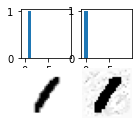

100%|██████████| 1000/1000 [00:13<00:00, 71.63it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[1.4272870e-06 9.9998927e-01 2.0288340e-11 3.0297111e-16 1.7061945e-09
  3.9548674e-08 4.1624011e-09 4.7601557e-06 4.5659285e-06 9.7258557e-09]]
Network prediction = 1
Actual and Adversarial example images: 


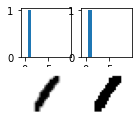

100%|██████████| 1000/1000 [00:14<00:00, 70.30it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[9.1814814e-04 1.8078332e-03 9.9677593e-01 5.7345323e-10 2.1539957e-07
  1.3209011e-08 1.0338947e-07 4.7882138e-05 4.4984862e-04 4.3377565e-08]]
Network prediction = 2
Actual and Adversarial example images: 


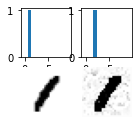

100%|██████████| 1000/1000 [00:13<00:00, 73.70it/s]

Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[2.6539415e-06 7.0687598e-03 1.5927311e-02 9.5678318e-01 1.7734583e-10
  1.2334698e-03 3.9489216e-05 2.4854817e-04 1.8696647e-02 2.9743404e-08]]
Network prediction = 3
Actual and Adversarial example images: 


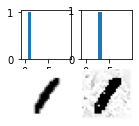

100%|██████████| 1000/1000 [00:13<00:00, 72.06it/s]

Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[1.5705483e-04 1.8051542e-02 2.3486643e-04 9.5836030e-12 9.5392311e-01
  5.8237028e-08 1.5757722e-06 1.8047393e-04 2.6976753e-02 4.7464776e-04]]
Network prediction = 4
Actual and Adversarial example images: 


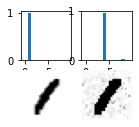

100%|██████████| 1000/1000 [00:13<00:00, 71.78it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[1.58884053e-04 1.16222002e-01 5.04691016e-05 1.19676779e-05
  1.00550714e-07 8.11062515e-01 3.85946711e-03 1.48852050e-04
  6.84792027e-02 6.50108814e-06]]
Network prediction = 5
Actual and Adversarial example images: 


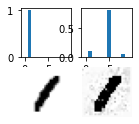

100%|██████████| 1000/1000 [00:13<00:00, 74.92it/s]

Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[4.0555537e-02 3.1097848e-02 7.9937136e-06 2.2240648e-10 4.3865184e-06
  3.1581082e-04 9.0826970e-01 1.2408524e-06 1.9718140e-02 2.9392777e-05]]
Network prediction = 6
Actual and Adversarial example images: 


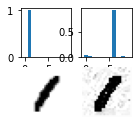

100%|██████████| 1000/1000 [00:13<00:00, 72.67it/s]

Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[5.3820992e-07 2.6450995e-02 1.7192129e-06 3.4961718e-11 7.9119467e-08
  1.2030654e-08 9.0895756e-11 9.7143888e-01 2.1074177e-03 2.9891913e-07]]
Network prediction = 7
Actual and Adversarial example images: 


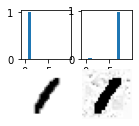

100%|██████████| 1000/1000 [00:15<00:00, 63.77it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[3.0942694e-05 4.8750425e-03 8.2817041e-07 6.4316122e-12 1.7013613e-06
  4.8911153e-07 4.1502496e-08 6.1693958e-05 9.9502712e-01 2.1247533e-06]]
Network prediction = 8
Actual and Adversarial example images: 


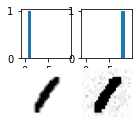

100%|██████████| 1000/1000 [00:15<00:00, 65.39it/s]


Adversarial Example: Network output = [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 1
Adversarial Example: Network output = [[5.4666884e-03 8.3951086e-02 2.8864774e-06 1.7710050e-09 1.1354199e-03
  5.1068027e-06 4.1183407e-06 4.6278830e-03 1.1014139e-01 7.9466540e-01]]
Network prediction = 9
Actual and Adversarial example images: 


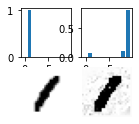

100%|██████████| 1000/1000 [00:14<00:00, 67.98it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[9.9165779e-01 3.2763768e-05 2.3094155e-03 1.3862742e-06 1.3838499e-03
  1.8591516e-05 3.8252855e-03 9.6714747e-10 7.6744775e-04 3.4319814e-06]]
Network prediction = 0
Actual and Adversarial example images: 


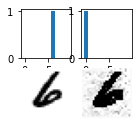

100%|██████████| 1000/1000 [00:13<00:00, 71.71it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[9.2822425e-09 9.4681191e-01 9.5674908e-03 1.3781819e-03 1.7584896e-02
  5.4338151e-03 7.8255357e-03 1.2366012e-05 1.1385029e-02 7.4282519e-07]]
Network prediction = 1
Actual and Adversarial example images: 


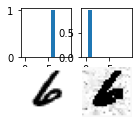

100%|██████████| 1000/1000 [00:14<00:00, 69.07it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[5.4298499e-10 1.7637554e-05 9.9909365e-01 1.7480890e-04 6.4212938e-05
  4.5499910e-06 6.4404594e-04 4.3766221e-08 1.0548334e-06 4.5148321e-10]]
Network prediction = 2
Actual and Adversarial example images: 


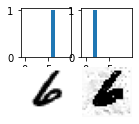

100%|██████████| 1000/1000 [00:13<00:00, 75.62it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[7.2992593e-12 5.5904269e-07 7.2163588e-05 9.9450797e-01 4.7256710e-09
  1.4271470e-03 3.9052418e-03 8.4543185e-11 8.6870918e-05 2.2125539e-10]]
Network prediction = 3
Actual and Adversarial example images: 


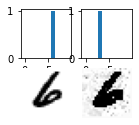

100%|██████████| 1000/1000 [00:13<00:00, 73.15it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[2.8770363e-11 7.0088259e-07 4.0630512e-06 9.8544284e-09 9.9876839e-01
  5.4723415e-08 1.2263474e-03 1.5091335e-10 4.9355549e-07 6.2804061e-11]]
Network prediction = 4
Actual and Adversarial example images: 


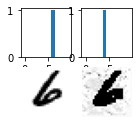

100%|██████████| 1000/1000 [00:13<00:00, 74.08it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[6.8659081e-13 7.9793892e-07 1.7027500e-10 9.9111767e-06 1.5634315e-10
  9.8460937e-01 1.5293358e-02 5.7722455e-12 8.6679000e-05 2.7066989e-11]]
Network prediction = 5
Actual and Adversarial example images: 


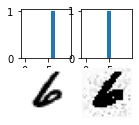

100%|██████████| 1000/1000 [00:13<00:00, 74.79it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[8.3806165e-16 3.4155307e-12 6.1710196e-13 3.9450221e-11 8.7248082e-12
  4.9551154e-06 9.9999499e-01 4.5951752e-17 2.6991786e-11 5.9946791e-17]]
Network prediction = 6
Actual and Adversarial example images: 


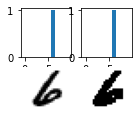

100%|██████████| 1000/1000 [00:13<00:00, 74.43it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[2.8554055e-06 3.9973292e-02 3.4502041e-02 8.6134765e-03 2.2589734e-02
  4.7957748e-03 4.3536727e-03 8.7890017e-01 6.2617660e-03 7.2511193e-06]]
Network prediction = 7
Actual and Adversarial example images: 


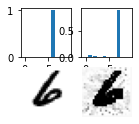

100%|██████████| 1000/1000 [00:13<00:00, 73.83it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[2.3192444e-08 5.6131717e-05 2.6667802e-04 9.3497249e-05 3.6619117e-03
  1.1346724e-03 3.7689798e-03 7.8669968e-09 9.9101675e-01 1.2802795e-06]]
Network prediction = 8
Actual and Adversarial example images: 


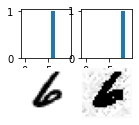

100%|██████████| 1000/1000 [00:13<00:00, 74.95it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Network prediction = 6
Adversarial Example: Network output = [[2.5273728e-05 9.2155830e-04 2.5196092e-03 1.2818434e-04 2.8407410e-01
  2.9726394e-02 1.5744450e-02 1.0596868e-06 1.5751971e-01 5.0933975e-01]]
Network prediction = 9
Actual and Adversarial example images: 


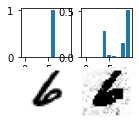

100%|██████████| 1000/1000 [00:13<00:00, 73.71it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[9.8838389e-01 3.7009162e-08 4.6177781e-03 8.8392386e-05 2.9193354e-03
  1.0469186e-11 3.0135291e-07 3.4090247e-06 3.9553149e-03 3.1491771e-05]]
Network prediction = 0
Actual and Adversarial example images: 


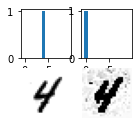

100%|██████████| 1000/1000 [00:13<00:00, 75.74it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[4.3475442e-08 9.0577060e-01 6.4281189e-09 2.8896205e-09 1.8772366e-02
  1.8520142e-10 5.6340060e-10 7.5157546e-02 2.9589125e-04 3.4953264e-06]]
Network prediction = 1
Actual and Adversarial example images: 


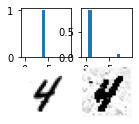

100%|██████████| 1000/1000 [00:14<00:00, 68.21it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[8.0739774e-08 2.4311120e-10 9.9947041e-01 1.1977822e-06 4.8606278e-04
  1.3666419e-13 9.5501801e-11 1.5923490e-06 4.0718420e-05 8.1964552e-10]]
Network prediction = 2
Actual and Adversarial example images: 


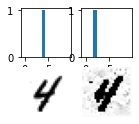

100%|██████████| 1000/1000 [00:14<00:00, 67.21it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[1.2480410e-06 7.9383060e-09 1.7565658e-04 9.8315811e-01 4.2254385e-03
  3.4072911e-11 1.0160169e-11 6.3466467e-03 5.6202468e-03 4.7264097e-04]]
Network prediction = 3
Actual and Adversarial example images: 


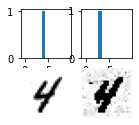

100%|██████████| 1000/1000 [00:13<00:00, 73.02it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[8.3074267e-14 8.8933201e-12 1.9325938e-15 2.6234053e-16 1.0000000e+00
  1.2945639e-17 9.5955002e-17 1.0239747e-10 2.0426665e-08 1.0424824e-08]]
Network prediction = 4
Actual and Adversarial example images: 


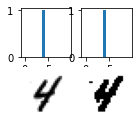

100%|██████████| 1000/1000 [00:14<00:00, 69.86it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[1.8732660e-05 4.1993935e-05 1.4358871e-07 1.7822107e-04 9.0975426e-03
  9.5769519e-01 1.1201209e-03 1.3219382e-04 2.3996612e-02 7.7192248e-03]]
Network prediction = 5
Actual and Adversarial example images: 


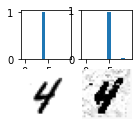

100%|██████████| 1000/1000 [00:15<00:00, 65.35it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[1.48400385e-02 1.52413327e-06 1.43142289e-03 4.53437542e-06
  7.66926119e-03 7.26893518e-07 9.74741518e-01 1.48394122e-07
  1.30583229e-03 4.91864921e-06]]
Network prediction = 6
Actual and Adversarial example images: 


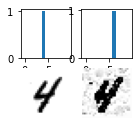

100%|██████████| 1000/1000 [00:13<00:00, 73.73it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[3.2383976e-10 3.1187299e-06 5.0158073e-09 8.7839844e-08 2.9790110e-03
  8.8560093e-14 1.0855489e-14 9.9700290e-01 8.8511906e-06 6.0188345e-06]]
Network prediction = 7
Actual and Adversarial example images: 


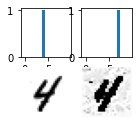

100%|██████████| 1000/1000 [00:15<00:00, 63.00it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[1.8588773e-08 6.1516037e-10 4.2737526e-08 1.2405015e-08 9.9238800e-03
  2.5797669e-12 5.9559194e-13 4.5730081e-07 9.9007493e-01 5.7619673e-07]]
Network prediction = 8
Actual and Adversarial example images: 


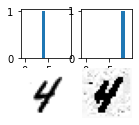

100%|██████████| 1000/1000 [00:13<00:00, 72.29it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Network prediction = 4
Adversarial Example: Network output = [[6.6711259e-08 4.9554401e-09 3.9474091e-09 2.0481871e-06 3.4426197e-02
  1.0318458e-11 1.5356309e-12 4.1058778e-05 2.2888565e-04 9.6530169e-01]]
Network prediction = 9
Actual and Adversarial example images: 


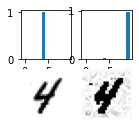

100%|██████████| 1000/1000 [00:13<00:00, 74.15it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[1.0000000e+00 1.8824754e-11 1.9448571e-10 1.9022443e-18 6.1225888e-15
  7.8688209e-15 7.3568249e-11 8.9876759e-11 2.6730807e-13 1.1124816e-13]]
Network prediction = 0
Actual and Adversarial example images: 


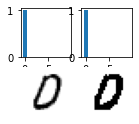

100%|██████████| 1000/1000 [00:13<00:00, 74.57it/s]


Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[2.0442568e-02 8.8869554e-01 5.4168631e-03 1.0107053e-07 3.7073144e-06
  1.6369336e-06 3.6156405e-04 8.5078046e-02 1.1306001e-08 1.8605633e-08]]
Network prediction = 1
Actual and Adversarial example images: 


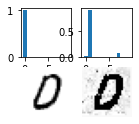

100%|██████████| 1000/1000 [00:13<00:00, 74.40it/s]


Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[9.6901413e-03 1.2823270e-09 9.9030930e-01 1.5798582e-12 6.2244154e-10
  1.3479366e-12 1.4046380e-08 6.3197018e-07 1.1183056e-09 9.1567335e-12]]
Network prediction = 2
Actual and Adversarial example images: 


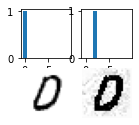

100%|██████████| 1000/1000 [00:13<00:00, 73.40it/s]


Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[4.5641186e-03 2.8736245e-05 1.6281093e-02 9.7698724e-01 1.7501274e-10
  5.7447640e-05 2.5965378e-04 1.8161009e-03 5.6143604e-06 1.8158003e-08]]
Network prediction = 3
Actual and Adversarial example images: 


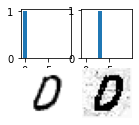

100%|██████████| 1000/1000 [00:13<00:00, 71.94it/s]


Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[3.9793000e-02 1.3240110e-05 2.8181102e-03 4.5239424e-12 9.5726925e-01
  7.5132318e-09 7.0134593e-06 9.2093571e-05 6.7705432e-06 5.8826612e-07]]
Network prediction = 4
Actual and Adversarial example images: 


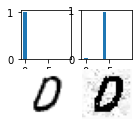

100%|██████████| 1000/1000 [00:13<00:00, 72.36it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[1.19472733e-02 9.16763733e-04 5.17021958e-03 1.55591278e-03
  4.60383864e-09 9.68214750e-01 1.17557235e-02 4.14421462e-04
  2.42877995e-05 6.57759188e-07]]
Network prediction = 5
Actual and Adversarial example images: 


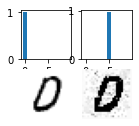

100%|██████████| 1000/1000 [00:14<00:00, 68.16it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[9.8003205e-03 3.7108990e-07 6.7208335e-03 8.7121343e-08 2.0188345e-08
  5.0579092e-07 9.8347765e-01 9.3848591e-08 1.2108849e-07 2.9716563e-11]]
Network prediction = 6
Actual and Adversarial example images: 


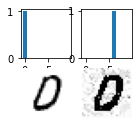

100%|██████████| 1000/1000 [00:13<00:00, 74.05it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[1.0015360e-02 9.0276235e-04 2.9345502e-03 8.1185969e-10 3.5684445e-07
  6.8958079e-09 3.4539859e-08 9.8614699e-01 7.6761353e-09 1.9434685e-09]]
Network prediction = 7
Actual and Adversarial example images: 


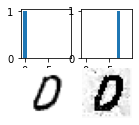

100%|██████████| 1000/1000 [00:13<00:00, 73.19it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[7.2969622e-03 4.9747310e-08 4.4156707e-04 5.7534484e-11 6.4413669e-08
  5.6190210e-08 1.6323334e-08 3.7789425e-06 9.9225724e-01 2.0352327e-07]]
Network prediction = 8
Actual and Adversarial example images: 


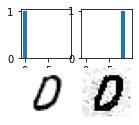

100%|██████████| 1000/1000 [00:13<00:00, 73.27it/s]

Adversarial Example: Network output = [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Network prediction = 0
Adversarial Example: Network output = [[2.8555838e-02 3.0645180e-05 1.1119689e-03 1.5541932e-10 2.3313391e-03
  5.3154089e-08 1.7151455e-06 7.9067383e-04 6.2879524e-05 9.6711493e-01]]
Network prediction = 9
Actual and Adversarial example images: 


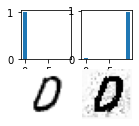

100%|██████████| 1000/1000 [00:14<00:00, 69.20it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[9.7165334e-01 3.9775518e-06 1.9380586e-04 3.7282825e-07 9.3822437e-06
  1.9851150e-03 1.2393956e-02 1.4040987e-09 1.2900403e-02 8.5959054e-04]]
Network prediction = 0
Actual and Adversarial example images: 


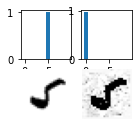

100%|██████████| 1000/1000 [00:15<00:00, 63.52it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[3.1686470e-10 9.8847497e-01 1.3100133e-08 2.2650862e-07 7.2857101e-06
  6.5546795e-03 9.5839717e-04 7.4436532e-05 3.9299396e-03 2.2173040e-08]]
Network prediction = 1
Actual and Adversarial example images: 


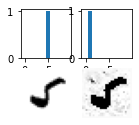

100%|██████████| 1000/1000 [00:14<00:00, 69.92it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[1.6054422e-08 1.0754850e-03 9.9081403e-01 2.7759895e-03 3.3454896e-06
  1.5829183e-03 1.8864651e-03 2.7353975e-05 1.8342983e-03 1.5263463e-07]]
Network prediction = 2
Actual and Adversarial example images: 


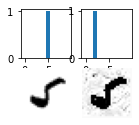

100%|██████████| 1000/1000 [00:13<00:00, 72.65it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[2.1823064e-12 8.3398290e-06 3.9396153e-07 9.9126136e-01 1.5779551e-11
  5.6975782e-03 2.6712212e-06 4.8027992e-08 3.0295386e-03 6.3148520e-10]]
Network prediction = 3
Actual and Adversarial example images: 


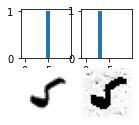

100%|██████████| 1000/1000 [00:13<00:00, 72.98it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[7.6791573e-10 6.4026957e-05 2.1357037e-08 2.3965290e-11 9.9727601e-01
  8.0131995e-04 3.7878088e-04 1.7704830e-08 1.4768210e-03 3.0560705e-06]]
Network prediction = 4
Actual and Adversarial example images: 


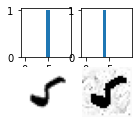

100%|██████████| 1000/1000 [00:13<00:00, 73.80it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[3.6806897e-13 6.3541606e-08 2.5438898e-13 2.0489133e-09 5.0530561e-12
  9.9979252e-01 7.5987111e-05 3.3090100e-13 1.3134380e-04 3.8393395e-09]]
Network prediction = 5
Actual and Adversarial example images: 


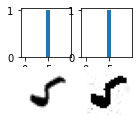

100%|██████████| 1000/1000 [00:13<00:00, 72.53it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[8.0727874e-10 1.5058146e-06 5.0812082e-10 5.0183718e-10 2.2997399e-06
  1.8925011e-03 9.9732286e-01 4.5147493e-12 7.8087422e-04 2.4384345e-08]]
Network prediction = 6
Actual and Adversarial example images: 


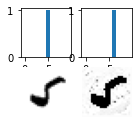

100%|██████████| 1000/1000 [00:14<00:00, 69.32it/s]

Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[3.9017567e-09 1.3281045e-02 1.4106649e-03 1.0106639e-03 4.4825060e-06
  1.0558780e-03 8.0162835e-07 9.7943234e-01 3.8033091e-03 8.9207407e-07]]
Network prediction = 7
Actual and Adversarial example images: 


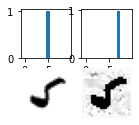

100%|██████████| 1000/1000 [00:14<00:00, 71.36it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[4.2540064e-12 2.8623572e-07 9.6840270e-12 2.1799642e-09 2.5912430e-08
  1.1732097e-02 9.2245093e-05 5.8491983e-12 9.8817527e-01 1.3582219e-07]]
Network prediction = 8
Actual and Adversarial example images: 


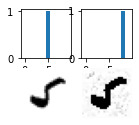

100%|██████████| 1000/1000 [00:13<00:00, 72.36it/s]


Adversarial Example: Network output = [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Network prediction = 5
Adversarial Example: Network output = [[7.5565686e-07 3.4436564e-06 6.4079764e-08 3.8763730e-08 1.3723797e-02
  1.8178400e-02 1.3818065e-04 3.5621571e-08 9.4761148e-02 8.7319416e-01]]
Network prediction = 9
Actual and Adversarial example images: 


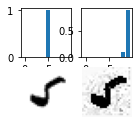

In [12]:
from tqdm import tqdm

for i in range(len(digits)):
    
    image = images[i].reshape(1, 28, 28, 1)
        
    for j in range(10):
        
        # getting the model
        mnist_classifier.trainable = False

        inp = l.Input(shape=(1,))
        hid = l.Dense(256, activation="relu")(inp)
        hid = l.Dense(28*28, activation="sigmoid")(hid)
        out = l.Reshape((28, 28))(hid)

        advModel = m.Model(inp, out)
        advModel.compile(
            loss='mean_squared_error',
            optimizer=o.Adam(lr=0.01),
            metrics=[tf.keras.metrics.RootMeanSquaredError()]
        )

        compModel = m.Model(inp, mnist_classifier(out))
        compModel.compile(
            loss='categorical_crossentropy',
            optimizer=o.Adam(lr=0.009),
            metrics=["accuracy"]
        )
        
        # defining one hot encoding for class
        one_hot = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],])
        one_hot[0][j] = 1
        
        for _ in tqdm(range(1000)):

            advModel.train_on_batch([np.array([1])], image)
            compModel.train_on_batch([np.array([1])], one_hot)

        advImage = advModel.predict([np.array([1])]).reshape(1, 28, 28, 1)
        predict_adv(image, advImage, mnist_classifier)